In [1]:
#from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
#
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#from sklearn import svm
from sklearn import metrics

#
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.pipeline import Pipeline
#
from sklearn.metrics import classification_report,confusion_matrix
#
## Oversampling 
from imblearn.over_sampling import SMOTE
#
##scaling
from sklearn.preprocessing import StandardScaler
#
##Preprocessing
from sklearn import preprocessing
from sklearn.decomposition import PCA
#
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
#
##Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection

c:\program files\python36\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [56]:
# Data import
location1 = 'D:\DATA\Loan Data\LoanStats_2018Q1.csv'

df_loanq1 = pd.read_csv(location1, header=1)

df_loanq1.head()

c:\program files\python36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,35000.0,35000.0,35000.0,60 months,13.58%,806.79,C,C2,Security Officer,7 years,MORTGAGE,160000.0,Source Verified,Mar-2018,Current,n,NaN,NaN,home_improvement,Home improvement,207xx,MD,7.87,0.0,Dec-2005,1.0,NaN,97.0,14.0,1.0,10333.0,24.5%,24.0,w,28807.40,28807.40,11242.25,11242.25,6192.60,5049.65,0.0,0.0,0.0,Jun-2019,806.79,Jul-2019,Jun-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,38964.0,3.0,1.0,1.0,1.0,3.0,28631.0,99.0,4.0,6.0,2674.0,55.0,42200.0,3.0,3.0,4.0,7.0,2783.0,12723.0,38.2,0.0,0.0,128.0,147.0,2.0,2.0,0.0,12.0,NaN,0.0,NaN,0.0,5.0,10.0,5.0,10.0,6.0,13.0,18.0,10.0,14.0,0.0,0.0,0.0,5.0,100.0,0.0,1.0,0.0,71160.0,38964.0,20600.0,28960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,24000.0,24000.0,24000.0,36 months,21.85%,914.71,D,D5,NaN,NaN,RENT,53000.0,Not Verified,Mar-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,398xx,GA,28.67,0.0,Dec-2000,0.0,NaN,NaN,7.0,0.0,23692.0,73.6%,11.0,w,16459.87,16459.87,12747.67,12747.67,7540.13,5207.54,0.0,0.0,0.0,May-2019,914.71,Jul-2019,Jun-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,43436.0,0.0,1.0,0.0,0.0,32.0,19744.0,63.0,0.0,1.0,7089.0,69.0,32200.0,0.0,0.0,1.0,1.0,6205.0,1408.0,89.7,0.0,0.0,79.0,207.0,13.0,13.0,0.0,32.0,NaN,12.0,NaN,0.0,3.0,5.0,3.0,3.0,4.0,6.0,7.0,5.0,7.0,0.0,0.0,0.0,0.0,100.0,66.7,0.0,0.0,63411.0,43436.0,13700.0,31211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2500.0,2500.0,2500.0,36 months,6.71%,76.87,A,A3,Facility manager,10+ years,MORTGAGE,53700.0,Source Verified,Mar-2018,Current,n,NaN,NaN,other,Other,166xx,PA,2

In [57]:
# Data import
location2 = 'D:\DATA\Loan Data\LoanStats_securev1_2018Q2.csv'

df_loanq2 = pd.read_csv(location2, header=1)

df_loanq2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,135788850,NaN,24000.0,24000.0,24000.0,36 months,6.83%,739.19,A,A3,Adjuster,8 years,RENT,62000.0,Source Verified,Jun-2018,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,060xx,CT,36.76,0.0,Jul-2005,775.0,779.0,1.0,NaN,NaN,16.0,0.0,11321.0,26.8%,40.0,w,0.00,0.00,24465.216104,24465.22,24000.00,428.26,36.96,0.0,0.0,Oct-2018,22913.66,NaN,Jun-2019,774.0,770.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,70756.0,2.0,4.0,1.0,1.0,6.0,59435.0,67.0,1.0,3.0,11134.0,49.0,42300.0,6.0,14.0,7.0,4.0,4422.0,19856.0,35.9,0.0,0.0,110.0,155.0,5.0,5.0,0.0,13.0,NaN,0.0,NaN,0.0,2.0,3.0,6.0,8.0,19.0,12.0,21.0,3.0,16.0,0.0,0.0,0.0,2.0,100.0,16.7,0.0,0.0,129493.0,70756.0,31000.0,87193.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,136055010,NaN,20000.0,20000.0,20000.0,60 months,26.77%,607.97,E,E5,HRSS,10+ years,MORTGAGE,65000.0,Source Verified,Jun-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,301xx,GA,35.41,0.0,Mar-2003,670.0,674.0,0.0,NaN,82.0,8.0,1.0,13796.0,77.5%,22.0,w,18008.47,18008.47,6628.180000,6628.18,1991.53,4636.65,0.00,0.0,0.0,May-2019,607.97,Jul-2019,Jun-2019,664.0,660.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,45906.0,0.0,3.0,0.0,0.0,32.0,32110.0,44.0,0.0,0.0,5142.0,51.0,17800.0,0.0,0.0,0.0,0.0,5738.0,1079.0,92.2,0.0,0.0,131.0,183.0,33.0,32.0,2.0,33.0,NaN,21.0,NaN,0.0,3.0,4.0,3.0,7.0,5.0,5.0,15.0,4.0,8.0,0.0,0.0,0.0,0.0,100.0,100.0,1.0,0.0,90868.0,45906.0,13900.0,73068.0,NaN

In [58]:
# Data import
location3 = 'D:\DATA\Loan Data\LoanStats_securev1_2018Q3.csv'

df_loanq3 = pd.read_csv(location3, header=1)

df_loanq3.head()

c:\program files\python36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,129,130,131,134,135,136,139) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,141124209,NaN,25000.0,25000.0,25000.0,36 months,16.14%,880.66,C,C4,Business Planner,10+ years,RENT,82000.0,Source Verified,Sep-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,940xx,CA,19.60,0.0,Mar-1994,695.0,699.0,1.0,NaN,NaN,10.0,0.0,15437.0,59.4%,17.0,w,19828.26,19828.26,7881.110000,7881.11,5171.74,2709.37,0.0,0.0,0.0,Jun-2019,880.66,Jul-2019,Jun-2019,739.0,735.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,39316.0,2.0,2.0,1.0,1.0,4.0,23879.0,59.0,4.0,5.0,5932.0,59.0,26000.0,0.0,0.0,1.0,6.0,3932.0,1844.0,87.7,0.0,0.0,127.0,294.0,1.0,1.0,0.0,1.0,NaN,1.0,NaN,0.0,4.0,6.0,4.0,4.0,5.0,8.0,12.0,6.0,10.0,0.0,0.0,0.0,5.0,94.1,75.0,0.0,0.0,66646.0,39316.0,15000.0,40646.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,141097380,NaN,20000.0,20000.0,20000.0,36 months,7.84%,625.26,A,A4,Teacher,10+ years,MORTGAGE,48186.0,Not Verified,Sep-2018,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,641xx,MO,24.68,0.0,Aug-1996,720.0,724.0,0.0,NaN,NaN,17.0,0.0,23822.0,58.8%,38.0,w,0.00,0.00,20784.182581,20784.18,20000.00,784.18,0.0,0.0,0.0,Apr-2019,17105.26,NaN,Apr-2019,729.0,725.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,191246.0,0.0,9.0,0.0,2.0,16.0,14800.0,48.0,1.0,1.0,11800.0,54.0,40500.0,1.0,0.0,0.0,3.0,11250.0,13078.0,57.8,0.0,0.0,265.0,239.0,8.0,8.0,2.0,8.0,NaN,16.0,NaN,0.0,3.0,4.0,6.0,7.0,27.0,7.0,9.0,4.0,17.0,0.0,0.0,0.0,1.0,100.0,16.7,0.0,0.0,234182.0,38622.0,31000.0,30832.0,NaN,

In [59]:
# Data import
location4 = 'D:\DATA\Loan Data\LoanStats_securev1_2018Q4.csv'

df_loanq4 = pd.read_csv(location4, header=1)

df_loanq4.head()

c:\program files\python36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,129,130,131,134,135,136,139,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,145638579,NaN,5000.0,5000.0,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,690.0,694.0,0.0,NaN,NaN,8.0,0.0,4599.0,19.1%,13.0,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,0.0,Jun-2019,180.69,Jul-2019,Jun-2019,609.0,605.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,110299.0,0.0,1.0,0.0,2.0,14.0,7150.0,72.0,0.0,2.0,0.0,35.0,24100.0,1.0,5.0,0.0,4.0,18383.0,13800.0,0.0,0.0,0.0,87.0,92.0,15.0,14.0,2.0,77.0,NaN,14.0,NaN,0.0,0.0,3.0,3.0,3.0,4.0,6.0,7.0,3.0,8.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,145636697,NaN,25000.0,25000.0,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1.0,Jan-1997,715.0,719.0,0.0,7.0,NaN,23.0,0.0,39053.0,45.7%,49.0,w,23533.24,23533.24,2908.95,2908.95,1466.76,1442.19,0.0,0.0,0.0,May-2019,587.82,Jul-2019,Jun-2019,729.0,725.0,0.0,7.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,95648.0,0.0,3.0,0.0,0.0,35.0,54716.0,23.0,1.0,2.0,8422.0,39.0,85500.0,0.0,1.0,0.0,2.0,4159.0,34837.0,44.5,0.0,0.0,263.0,246.0,10.0,10.0,0.0,48.0,NaN,NaN,NaN,0.0,9.0,13.0,10.0,14.0,21.0,19.0,27.0,13.0,23.0,0.0,0.0,1.0,1.0,98.0,10.0,0.0,0.0,179321.0,95648.0,62800.0,91424.0,NaN,NaN,NaN,NaN,

In [60]:
df = pd.concat([df_loanq1, df_loanq2, df_loanq3, df_loanq4], axis=0, sort=False, join = 'outer') # this will produce NA values for columns not present in the Q1 data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495250 entries, 0 to 128413
Columns: 150 entries, id to sec_app_fico_range_high
dtypes: float64(112), object(38)
memory usage: 570.5+ MB


In [61]:
lst = [df_loanq1, df_loanq2, df_loanq3, df_loanq4]
del df_loanq1, df_loanq2, df_loanq3, df_loanq4 # dfs still in list
del lst     # memory release now

In [62]:
import gc
gc.collect()

108

In [63]:
pd.set_option('display.max_columns', None)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,sec_app_fico_range_low,sec_app_fico_range_high
0,NaN,NaN,35000.0,35000.0,35000.0,60 months,13.58%,806.79,C,C2,Security Officer,7 years,MORTGAGE,160000.0,Source Verified,Mar-2018,Current,n,NaN,NaN,home_improvement,Home improvement,207xx,MD,7.87,0.0,Dec-2005,1.0,NaN,97.0,14.0,1.0,10333.0,24.5%,24.0,w,28807.40,28807.40,11242.25,11242.25,6192.60,5049.65,0.0,0.0,0.0,Jun-2019,806.79,Jul-2019,Jun-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,38964.0,3.0,1.0,1.0,1.0,3.0,28631.0,99.0,4.0,6.0,2674.0,55.0,42200.0,3.0,3.0,4.0,7.0,2783.0,12723.0,38.2,0.0,0.0,128.0,147.0,2.0,2.0,0.0,12.0,NaN,0.0,NaN,0.0,5.0,10.0,5.0,10.0,6.0,13.0,18.0,10.0,14.0,0.0,0.0,0.0,5.0,100.0,0.0,1.0,0.0,71160.0,38964.0,20600.0,28960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,24000.0,24000.0,24000.0,36 months,21.85%,914.71,D,D5,NaN,NaN,RENT,53000.0,Not Verified,Mar-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,398xx,GA,28.67,0.0,Dec-2000,0.0,NaN,NaN,7.0,0.0,23692.0,73.6%,11.0,w,16459.87,16459.87,12747.67,12747.67,7540.13,5207.54,0.0,0.0,0.0,May-2019,914.71,Jul-2019,Jun-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,43436.0,0.0,1.0,0.0,0.0,32.0,19744.0,63.0,0.0,1.0,7089.0,69.0,32200.0,0.0,0.0,1.0,1.0,6205.0,1408.0,89.7,0.0,0.0,79.0,207.0,13.0,13.0,0.0,32.0,NaN,12.0,NaN,0.0,3.0,5.0,3.0,3.0,4.0,6.0,7.0,5.0,7.0,0.0,0.0,0.0,0.0,100.0,66.7,0.0,0.0,63411.0,43436.0,13700.0,31211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,desc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,sec_app_fico_range_low,sec_app_fico_range_high
count,0.0,495242.000000,495242.000000,495242.000000,495242.000000,4.952420e+05,0.0,494110.000000,495242.000000,495242.000000,218590.000000,62984.000000,495242.000000,495242.000000,4.952420e+05,495242.000000,495242.000000,495242.00000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.00000,114833.000000,495242.0,6.898500e+04,68985.000000,495242.000000,4.952420e+05,4.952420e+05,495242.000000,495242.000000,495242.000000,495242.000000,476832.000000,4.952420e+05,414418.000000,495242.000000,495242.000000,4.952420e+05,495113.000000,4.952420e+05,495242.000000,495242.000000,495242.000000,495242.000000,495202.000000,488654.000000,488439.000000,495242.000000,495242.000000,476832.000000,495242.000000,495242.000000,495242.000000,495242.000000,489044.000000,98110.000000,433937.000000,142690.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,495242.000000,482838.0,495242.000000,495242.000000,495242.000000,495240.000000,488646.000000,495242.000000,495242.000000,4.952420e+05,4.952420e+05,4.952420e+05,4.952420e+05,6.898500e+04,68985.000000,68985.000000,68985.000000,67788.000000,68985.000000,68985.000000,68985.000000,68985.000000,22377.000000,685.0,685.000000,685.0,685.000000,550.000000,685.000000,685.000000,1119.000000,1119.000000,1119.000000,387378.000000,387378.000000,387378.000000,387378.000000,52654.000000,52654.000000
mean,NaN,16025.020394,16025.020394,16021.669277,466.609094,8.009399e+04,NaN,19.668887,0.229252,0.442192,36.889771,83.338689,11.491554,0.134514,1.627083e+04,22.624151,10457.586501,10455.63440,6626.757686,6625.160316,5069.781429,1530.176743,0.759868,26.039648,4.621871,2043.907431,0.01768,46.319281,1.0,1.283419e+05,19.357812,0.000052,2.143619e+02,1.439598e+05,0.898078,2.700815,0.672936,1.526753,21.100450,3.532369e+04,68.003902,1.228062,2.623687,5.862635e+03,54.087778,3.834538e+04,1.086802,1.484854,1.937368,4.426622,13709.348688,15057.282179,49.867127,0.006823,1.792829,122.954602,174.638102,15.131693,8.718534,1.336308,25.552897,40.467170,7.488555,37.753115,0

#### What are the total number of loans?
The total number of loans amounts to 495,250.

#### How many columns does the dataset have?
The dataset has 150 columns in total, even though the Q1 data has 144 columns.




In [65]:
pd.set_option('display.max_rows', None)

df.isnull().sum()

id                                            107864
member_id                                     495250
loan_amnt                                          8
funded_amnt                                        8
funded_amnt_inv                                    8
term                                               8
int_rate                                           8
installment                                        8
grade                                              8
sub_grade                                          8
emp_title                                      54667
emp_length                                     41995
home_ownership                                     8
annual_inc                                         8
verification_status                                8
issue_d                                            8
loan_status                                        8
pymnt_plan                                         8
url                                           

#### How may columns contain missing data? What is the count of missing data for each of this column?
All columns have at least 8 NA values, and columns 'member_id' and 'desc' don't have any data. Missing data counts for each column can be seen above.

In [66]:
df.loan_status.value_counts()

Current               395475
Fully Paid             69775
Charged Off            15787
Late (31-120 days)      8905
In Grace Period         3642
Late (16-30 days)       1649
Default                    9
Name: loan_status, dtype: int64

#### How many loans are still current?
Current loans amount to 395,465.

# Exploratory Data Analysis

In [67]:
fp_off_df = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]

In [68]:
fp_off_df.sample(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,sec_app_fico_range_low,sec_app_fico_range_high
6285,NaN,NaN,17000.0,17000.0,17000.0,60 months,16.01%,413.50,C,C5,Mgr,4 years,MORTGAGE,72500.0,Not Verified,Mar-2018,Fully Paid,n,NaN,NaN,major_purchase,Major purchase,471xx,IN,24.98,0.0,Nov-2002,0.0,NaN,108.0,10.0,1.0,10737.0,37.2%,26.0,w,0.0,0.0,19664.403725,19664.40,17000.00,2664.40,0.0,0.0,0.0,Mar-2019,15131.02,NaN,Jun-2019,0.0,NaN,1.0,Joint App,137500.0,24.26,Not Verified,0.0,0.0,227740.0,0.0,3.0,2.0,3.0,7.0,41260.0,77.0,1.0,3.0,5789.0,63.0,28900.0,1.0,0.0,3.0,7.0,22774.0,12020.0,34.0,0.0,0.0,147.0,184.0,12.0,7.0,3.0,12.0,NaN,7.0,NaN,0.0,2.0,4.0,3.0,5.0,12.0,6.0,11.0,4.0,10.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,263542.0,51997.0,18200.0,53346.0,67733.0,Nov-1996,0.0,3.0,10.0,36.9,5.0,11.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40631,134500550,NaN,5000.0,5000.0,5000.0,36 months,19.42%,184.35,D,D3,Staff RN,6 years,MORTGAGE,75000.0,Not Verified,May-2018,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,197xx,DE,10.75,0.0,May-2005,0.0,73.0,NaN,8.0,0.0,13127.0,59.7%,22.0,w,0.0,0.0,5155.321847,5155.32,5000.00,155.32,0.0,0.0,0.0,Aug-2018,4981.76,NaN,Jun-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,234833.0,1.0,4.0,0.0,3.0,19.0,6337.0,74.0,2.0,2.0,7318.0,64.0,22000.0,1.0,0.0,0.0,5.0,29354.0,8068.0,59.7,0.0,0.0,102.0,156.0,2.0,2.0,3.0,2.0,NaN,22.0,73.0,0.0,2.0,3.0,2.0,8.0,7.0,3.0,12.0,3.0,8.0,0.0,0.0,0.0,2.0,95.5,50.0,0.0,0.0,255417.0,19464.0,20000.0,8550.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [69]:
lst2 = [df]
del df # df still in list
del lst2     # memory release now
gc.collect()

14

In [70]:
# This mapping will allow to see the correlation between the different numerical features and the loan status.

status_mapping = {'Fully Paid': 0,'Charged Off': 1}
fp_off_df['loan_status'] = fp_off_df['loan_status'].map(status_mapping)

In [71]:
# Pushes Class column to the end of the dataframe for easier indexing
col_at_end = ['loan_status']

fp_off_df = fp_off_df[[c for c in fp_off_df if c not in col_at_end] 
                    + [c for c in col_at_end if c in fp_off_df]]
fp_off_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,sec_app_fico_range_low,sec_app_fico_range_high,loan_status
11,NaN,NaN,10000.0,10000.0,10000.0,60 months,14.07%,233.05,C,C3,Teacher,4 years,RENT,42000.0,Source Verified,Mar-2018,n,NaN,NaN,major_purchase,Major purchase,341xx,FL,24.69,0.0,Oct-2004,0.0,32.0,NaN,17.0,0.0,707.0,15.7%,34.0,w,0.0,0.0,11153.669505,11153.67,10000.00,1153.67,0.0,0.0,0.0,Mar-2019,10.38,NaN,Jun-2019,0.0,40.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,93913.0,0.0,15.0,0.0,0.0,54.0,93206.0,116.0,0.0,1.0,707.0,111.0,4500.0,0.0,0.0,0.0,1.0,5524.0,3793.0,15.7,0.0,0.0,161.0,88.0,18.0,18.0,0.0,18.0,32.0,18.0,32.0,14.0,1.0,1.0,2.0,4.0,30.0,2.0,4.0,1.0,17.0,0.0,0.0,0.0,0.0,43.8,0.0,0.0,0.0,84930.0,93913.0,4500.0,80430.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16,NaN,NaN,7000.0,7000.0,7000.0,36 months,11.98%,232.44,B,B5,Parole,< 1 year,MORTGAGE,40000.0,Verified,Mar-2018,n,NaN,NaN,home_improvement,Home improvement,797xx,TX,20.25,0.0,Mar-2007,0.0,60.0,NaN,13.0,0.0,5004.0,36%,29.0,w,0.0,0.0,7693.314943,7693.31,7000.00,693.31,0.0,0.0,0.0,Mar-2019,5364.25,NaN,Mar-2019,0.0,60.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,131726.0,1.0,6.0,0.0,2.0,16.0,126722.0,102.0,2.0,2.0,3944.0,90.0,13900.0,2.0,1.0,4.0,4.0,10977.0,4996.0,50.0,0.0,0.0,122.0,132.0,1.0,1.0,0.0,10.0,64.0,5.0,60.0,3.0,2.0,2.0,3.0,4.0,19.0,7.0,10.0,2.0,13.0,0.0,0.0,0.0,2.0,89.7,33.3,0.0,0.0,132817.0,131726.0,10000.0,118917.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
17,NaN,NaN,20000.0,20000.0,20000.0,60 mo

In [72]:
fp_off_df.shape

(85562, 150)

In [73]:
fp_off_df.isnull().mean()

id                                            0.350191
member_id                                     1.000000
loan_amnt                                     0.000000
funded_amnt                                   0.000000
funded_amnt_inv                               0.000000
term                                          0.000000
int_rate                                      0.000000
installment                                   0.000000
grade                                         0.000000
sub_grade                                     0.000000
emp_title                                     0.097368
emp_length                                    0.086580
home_ownership                                0.000000
annual_inc                                    0.000000
verification_status                           0.000000
issue_d                                       0.000000
pymnt_plan                                    0.000000
url                                           0.350191
desc      

In [74]:
# We'll keep features where NA values amount to less the 30%
# and for the remaining features the NA values will be replaced with the median value of the data.

fp_off_df.columns[fp_off_df.isnull().mean() <= 0.3]

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_

In [75]:
fp_off_df = fp_off_df[fp_off_df.columns[fp_off_df.isnull().mean() <= 0.3]]
fp_off_df.shape

(85562, 100)

In [76]:
fp_off_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_status
11,10000.0,10000.0,10000.0,60 months,14.07%,233.05,C,C3,Teacher,4 years,RENT,42000.0,Source Verified,Mar-2018,n,major_purchase,Major purchase,341xx,FL,24.69,0.0,Oct-2004,0.0,17.0,0.0,707.0,15.7%,34.0,w,0.0,0.0,11153.669505,11153.67,10000.00,1153.67,0.0,0.0,0.0,Mar-2019,10.38,Jun-2019,0.0,1.0,Individual,0.0,0.0,93913.0,0.0,15.0,0.0,0.0,54.0,93206.0,116.0,0.0,1.0,707.0,111.0,4500.0,0.0,0.0,0.0,1.0,5524.0,3793.0,15.7,0.0,0.0,161.0,88.0,18.0,18.0,0.0,18.0,18.0,14.0,1.0,1.0,2.0,4.0,30.0,2.0,4.0,1.0,17.0,0.0,0.0,0.0,0.0,43.8,0.0,0.0,0.0,84930.0,93913.0,4500.0,80430.0,N,N,0
16,7000.0,7000.0,7000.0,36 months,11.98%,232.44,B,B5,Parole,< 1 year,MORTGAGE,40000.0,Verified,Mar-2018,n,home_improvement,Home improvement,797xx,TX,20.25,0.0,Mar-2007,0.0,13.0,0.0,5004.0,36%,29.0,w,0.0,0.0,7693.314943,7693.31,7000.00,693.31,0.0,0.0,0.0,Mar-2019,5364.25,Mar-2019,0.0,1.0,Individual,0.0,0.0,131726.0,1.0,6.0,0.0,2.0,16.0,126722.0,102.0,2.0,2.0,3944.0,90.0,13900.0,2.0,1.0,4.0,4.0,10977.0,4996.0,50.0,0.0,0.0,122.0,132.0,1.0,1.0,0.0,10.0,5.0,3.0,2.0,2.0,3.0,4.0,19.0,7.0,10.0,2.0,13.0,0.0,0.0,0.0,2.0,89.7,33.3,0.0,0.0,132817.0,131726.0,10000.0,118917.0,N,N,0
17,20000.0,20000.0,20000.0,60 months,26.77%,607.97,E,E5,Mental Health Provider,3 years,RENT,33500.0,Not Verified,Mar-2018,n,house,Home buying,604xx,IL,24.40,0.0,Aug-2008,1.0,27.0,0.0,7364.0,46%,34.0,w,0.0,0.0,7236.150000,7236.15,2195.37,5040.78,0.0,0.0,0.0,Apr-2019,607.97,Jun-2019,0.0,1.0,Individual,0.0,308.0,160804.0,0.0,21.0,0.0,0.0,29.0,153440.0,118.0,0.0,2.0,2607.0,110.0,16000.0,0.0,0.0,2.0,2.0,5956.0,2767.0,68.6,0.0,0.0,115.0,115.0,20.0,20.0,0.0,26.0,5.0,0.0,3.0,6.0,3.0,3.0,27.0,6.0,7.0,6.0,27.0,0.0,0.0,0.0,0.0,100.0,33.3,0.0,0.0,146514.0,160804.0,8800.0,130514.0,N,N,1
20,21000.0,21000.0,21000.0,60 months,20.39%,560.94,D,D4,Machine operator,10+ years,OWN,85000.0,Source Verified,Mar-2018,n,house,Home buying,135xx,NY,15.76,1.0,Nov-2008,0.0,15.0,0.0,14591.0,34.2%,27.0,w,0.0,0.0,24217.170915,24217.17,21000.00,3217.17,0.0,0.0,0.0,Feb-2019,183.26,May-2019,0.0,1.0,Individual,0.0,0.0,128270.0,1.0,1.0,2.0,2.0,7.0,37076.0,NaN,2.0,5.0,5354.0,34.0,42700.0,6.0,4.0,13.0,8.0,8551.0,16684.0,38.4,0.0,0.0,67.0,112.0,4.0,4.0,3.0,4.0,0.0,0.0,5.0,7.0,6.0,10.0,3.0,12.0,21.0,7.0,15.0,0.0,0.0,0.0,4.0,92.6,16.7,0.0,0.0,172433.0,51667.0,27100.0,39733.0,N,N,0
23,30000.0,30000.0,30000.0,36 months,7.34%,930.99,A,A4,Owner,3 years,OWN,95000.0,Verified,Mar-2018,n,house,Home buying,797xx,TX,16.18,1.0,Oct-2009,0.0,10.0,0.0,755.0,0%,20.0,w,0.0,0.0,31484.416866,31484.42,30000.00,1484.42,0.0,0.0,0.0,Jan-2019,24060.97,Jan-2019,0.0,1.0,Individual,0.0,2157.0,12704.0

In [77]:
# Identifiying presence of NA values
fp_off_df.isnull().values.any()
fp_off_df.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      8331
emp_length                     7408
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
pymnt_plan                        0
purpose                           0
title                             0
zip_code                          0
addr_state                        0
dti                             225
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      127
total_acc                   

In [78]:
# interest rate encoding

fp_off_df['int_rate'] = fp_off_df['int_rate'].map(lambda x: x.rstrip('%'))
fp_off_df['int_rate'] = pd.to_numeric(fp_off_df['int_rate'])

In [79]:
# there are values NA values in revol_util as the string 'nan'. This will replace them for NaN

fp_off_df['revol_util'] = fp_off_df.revol_util.apply(str)

fp_off_df['revol_util'] = fp_off_df['revol_util'].map(lambda x: x.rstrip('%'))

fp_off_df['revol_util'] = fp_off_df.revol_util.apply(float)

In [80]:
fp_off_df["revol_util"].fillna(fp_off_df.groupby('loan_status')['revol_util'].transform('median'), inplace=True)

In [81]:
fp_off_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,loan_status
11,10000.0,10000.0,10000.0,60 months,14.07,233.05,C,C3,Teacher,4 years,RENT,42000.0,Source Verified,Mar-2018,n,major_purchase,Major purchase,341xx,FL,24.69,0.0,Oct-2004,0.0,17.0,0.0,707.0,15.7,34.0,w,0.0,0.0,11153.669505,11153.67,10000.00,1153.67,0.0,0.0,0.0,Mar-2019,10.38,Jun-2019,0.0,1.0,Individual,0.0,0.0,93913.0,0.0,15.0,0.0,0.0,54.0,93206.0,116.0,0.0,1.0,707.0,111.0,4500.0,0.0,0.0,0.0,1.0,5524.0,3793.0,15.7,0.0,0.0,161.0,88.0,18.0,18.0,0.0,18.0,18.0,14.0,1.0,1.0,2.0,4.0,30.0,2.0,4.0,1.0,17.0,0.0,0.0,0.0,0.0,43.8,0.0,0.0,0.0,84930.0,93913.0,4500.0,80430.0,N,N,0
16,7000.0,7000.0,7000.0,36 months,11.98,232.44,B,B5,Parole,< 1 year,MORTGAGE,40000.0,Verified,Mar-2018,n,home_improvement,Home improvement,797xx,TX,20.25,0.0,Mar-2007,0.0,13.0,0.0,5004.0,36.0,29.0,w,0.0,0.0,7693.314943,7693.31,7000.00,693.31,0.0,0.0,0.0,Mar-2019,5364.25,Mar-2019,0.0,1.0,Individual,0.0,0.0,131726.0,1.0,6.0,0.0,2.0,16.0,126722.0,102.0,2.0,2.0,3944.0,90.0,13900.0,2.0,1.0,4.0,4.0,10977.0,4996.0,50.0,0.0,0.0,122.0,132.0,1.0,1.0,0.0,10.0,5.0,3.0,2.0,2.0,3.0,4.0,19.0,7.0,10.0,2.0,13.0,0.0,0.0,0.0,2.0,89.7,33.3,0.0,0.0,132817.0,131726.0,10000.0,118917.0,N,N,0
17,20000.0,20000.0,20000.0,60 months,26.77,607.97,E,E5,Mental Health Provider,3 years,RENT,33500.0,Not Verified,Mar-2018,n,house,Home buying,604xx,IL,24.40,0.0,Aug-2008,1.0,27.0,0.0,7364.0,46.0,34.0,w,0.0,0.0,7236.150000,7236.15,2195.37,5040.78,0.0,0.0,0.0,Apr-2019,607.97,Jun-2019,0.0,1.0,Individual,0.0,308.0,160804.0,0.0,21.0,0.0,0.0,29.0,153440.0,118.0,0.0,2.0,2607.0,110.0,16000.0,0.0,0.0,2.0,2.0,5956.0,2767.0,68.6,0.0,0.0,115.0,115.0,20.0,20.0,0.0,26.0,5.0,0.0,3.0,6.0,3.0,3.0,27.0,6.0,7.0,6.0,27.0,0.0,0.0,0.0,0.0,100.0,33.3,0.0,0.0,146514.0,160804.0,8800.0,130514.0,N,N,1
20,21000.0,21000.0,21000.0,60 months,20.39,560.94,D,D4,Machine operator,10+ years,OWN,85000.0,Source Verified,Mar-2018,n,house,Home buying,135xx,NY,15.76,1.0,Nov-2008,0.0,15.0,0.0,14591.0,34.2,27.0,w,0.0,0.0,24217.170915,24217.17,21000.00,3217.17,0.0,0.0,0.0,Feb-2019,183.26,May-2019,0.0,1.0,Individual,0.0,0.0,128270.0,1.0,1.0,2.0,2.0,7.0,37076.0,NaN,2.0,5.0,5354.0,34.0,42700.0,6.0,4.0,13.0,8.0,8551.0,16684.0,38.4,0.0,0.0,67.0,112.0,4.0,4.0,3.0,4.0,0.0,0.0,5.0,7.0,6.0,10.0,3.0,12.0,21.0,7.0,15.0,0.0,0.0,0.0,4.0,92.6,16.7,0.0,0.0,172433.0,51667.0,27100.0,39733.0,N,N,0
23,30000.0,30000.0,30000.0,36 months,7.34,930.99,A,A4,Owner,3 years,OWN,95000.0,Verified,Mar-2018,n,house,Home buying,797xx,TX,16.18,1.0,Oct-2009,0.0,10.0,0.0,755.0,0.0,20.0,w,0.0,0.0,31484.416866,31484.42,30000.00,1484.42,0.0,0.0,0.0,Jan-2019,24060.97,Jan-2019,0.0,1.0,Individual,0.0,2157.0,12704.0,0.0

In [82]:
fp_off_df.fillna(fp_off_df.median(), inplace=True)
fp_off_df.isnull().values.any() # there are still NA values, most possibly where values are categorical

True

In [83]:
# remove constant columns
fp_off_df = fp_off_df.loc[:, (fp_off_df != fp_off_df.iloc[0]).any()] 

In [84]:
fp_off_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,loan_status
11,10000.0,10000.0,10000.0,60 months,14.07,233.05,C,C3,Teacher,4 years,RENT,42000.0,Source Verified,Mar-2018,major_purchase,Major purchase,341xx,FL,24.69,0.0,Oct-2004,0.0,17.0,0.0,707.0,15.7,34.0,w,11153.669505,11153.67,10000.00,1153.67,0.0,0.0,0.0,Mar-2019,10.38,Jun-2019,0.0,Individual,0.0,0.0,93913.0,0.0,15.0,0.0,0.0,54.0,93206.0,116.0,0.0,1.0,707.0,111.0,4500.0,0.0,0.0,0.0,1.0,5524.0,3793.0,15.7,0.0,0.0,161.0,88.0,18.0,18.0,0.0,18.0,18.0,14.0,1.0,1.0,2.0,4.0,30.0,2.0,4.0,1.0,17.0,0.0,0.0,0.0,43.8,0.0,0.0,0.0,84930.0,93913.0,4500.0,80430.0,N,0
16,7000.0,7000.0,7000.0,36 months,11.98,232.44,B,B5,Parole,< 1 year,MORTGAGE,40000.0,Verified,Mar-2018,home_improvement,Home improvement,797xx,TX,20.25,0.0,Mar-2007,0.0,13.0,0.0,5004.0,36.0,29.0,w,7693.314943,7693.31,7000.00,693.31,0.0,0.0,0.0,Mar-2019,5364.25,Mar-2019,0.0,Individual,0.0,0.0,131726.0,1.0,6.0,0.0,2.0,16.0,126722.0,102.0,2.0,2.0,3944.0,90.0,13900.0,2.0,1.0,4.0,4.0,10977.0,4996.0,50.0,0.0,0.0,122.0,132.0,1.0,1.0,0.0,10.0,5.0,3.0,2.0,2.0,3.0,4.0,19.0,7.0,10.0,2.0,13.0,0.0,0.0,2.0,89.7,33.3,0.0,0.0,132817.0,131726.0,10000.0,118917.0,N,0
17,20000.0,20000.0,20000.0,60 months,26.77,607.97,E,E5,Mental Health Provider,3 years,RENT,33500.0,Not Verified,Mar-2018,house,Home buying,604xx,IL,24.40,0.0,Aug-2008,1.0,27.0,0.0,7364.0,46.0,34.0,w,7236.150000,7236.15,2195.37,5040.78,0.0,0.0,0.0,Apr-2019,607.97,Jun-2019,0.0,Individual,0.0,308.0,160804.0,0.0,21.0,0.0,0.0,29.0,153440.0,118.0,0.0,2.0,2607.0,110.0,16000.0,0.0,0.0,2.0,2.0,5956.0,2767.0,68.6,0.0,0.0,115.0,115.0,20.0,20.0,0.0,26.0,5.0,0.0,3.0,6.0,3.0,3.0,27.0,6.0,7.0,6.0,27.0,0.0,0.0,0.0,100.0,33.3,0.0,0.0,146514.0,160804.0,8800.0,130514.0,N,1
20,21000.0,21000.0,21000.0,60 months,20.39,560.94,D,D4,Machine operator,10+ years,OWN,85000.0,Source Verified,Mar-2018,house,Home buying,135xx,NY,15.76,1.0,Nov-2008,0.0,15.0,0.0,14591.0,34.2,27.0,w,24217.170915,24217.17,21000.00,3217.17,0.0,0.0,0.0,Feb-2019,183.26,May-2019,0.0,Individual,0.0,0.0,128270.0,1.0,1.0,2.0,2.0,7.0,37076.0,74.0,2.0,5.0,5354.0,34.0,42700.0,6.0,4.0,13.0,8.0,8551.0,16684.0,38.4,0.0,0.0,67.0,112.0,4.0,4.0,3.0,4.0,0.0,0.0,5.0,7.0,6.0,10.0,3.0,12.0,21.0,7.0,15.0,0.0,0.0,4.0,92.6,16.7,0.0,0.0,172433.0,51667.0,27100.0,39733.0,N,0
23,30000.0,30000.0,30000.0,36 months,7.34,930.99,A,A4,Owner,3 years,OWN,95000.0,Verified,Mar-2018,house,Home buying,797xx,TX,16.18,1.0,Oct-2009,0.0,10.0,0.0,755.0,0.0,20.0,w,31484.416866,31484.42,30000.00,1484.42,0.0,0.0,0.0,Jan-2019,24060.97,Jan-2019,0.0,Individual,0.0,2157.0,12704.0,0.0,1.0,0.0,1.0,22.0,10747.0,74.0,0.0,2.0,741.0,3.0,101800.0,1.0,3.0,0.0,3.0,1412.0,90245.0,0.0,0.0,0.0,101.0,98.0,13.0,13.0,0.0,19.0,24.0,0.0,2.0,2.0,4.0,6.0,5.0,8.0,13.0,2.

Text(0.5, 1.0, 'Correlation Matrix for "Fully Paid" and "Charged-Off" Loans')

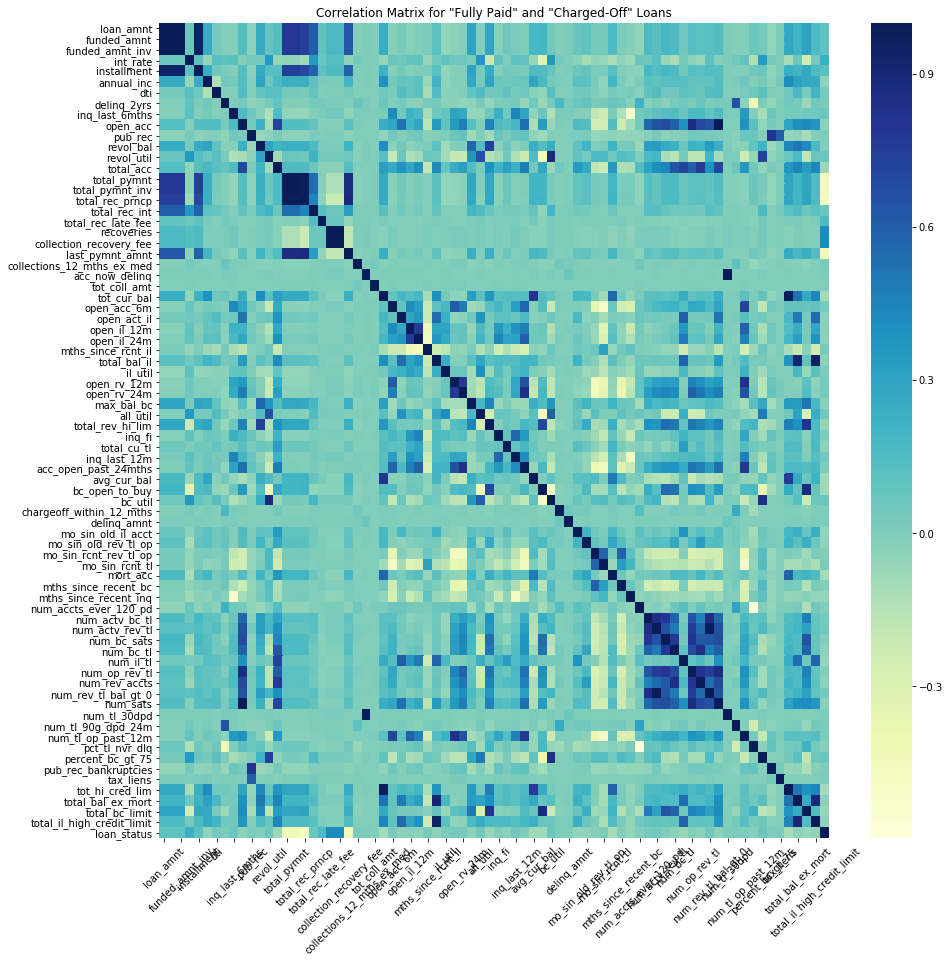

In [85]:
plt.rcParams['figure.figsize']=(15,15)
corr = fp_off_df.corr()
ax = sns.heatmap(corr, annot = False, cmap="YlGnBu")     
plt.setp(ax.axes.get_xticklabels(), rotation=45)

plt.title('Correlation Matrix for "Fully Paid" and "Charged-Off" Loans')

It's much easier to analyze the correlations as a table than a heatmap.

In [86]:
corr

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status
loan_amnt,1.000000,1.000000,0.999996,0.064321,0.951794,0.259117,0.035443,-0.003557,-0.015973,0.138508,-0.035118,0.260597,0.080490,0.136562,0.784047,0.784081,0.739901,0.596546,0.094262,0.169921,0.169157,0.632733,-0.015568,0.002222,0.000670,0.245549,-0.018599,0.024490,-0.017624,0.001204,0.008215,0.119471,-0.052275,-0.023755,-0.013767,0.300600,-0.000981,0.292125,-0.023324,0.055222,0.016457,0.006934,0.177129,0.192424,0.044151,-0.009230,0.008927,0.072406,0.102070,0.021241,0.025445,0.162763,0.007426,-0.016978,-0.044813,0.162179,0.122096,0.187340,0.167434,0.055414,0.128682,0.118957,0.121298,0.139016,0.002222,-0.012083,-0.015852,0.065922,0.028899,-0.050067,0.008223,0.272100,0.212266,0.307075,0.163192,0.106242
funded_amnt,1.000000,1.000000,0.999996,0.064321,0.951794,0.259117,0.035443,-0.003557,-0.015973,0.138508,-0.035118,0.260597,0.080490,0.136562,0.784047,0.784081,0.739901,0.596546,0.094262,0.169921,0.169157,0.632733,-0.015568,0.002222,0.000670,0.245549,-0.018599,0.024490,-0.017624,0.001204,0.008215,0.119471,-0.052275,-0.023755,-0.013767,0.300600,-0.000981,0.292125,-0.023324,0.055222,0.016457,0.006934,0.177129,0.192424,0.044151,-0.009230,0.008927,0.072406,0.102070,0.021241,0.025445,0.162763,0.007426,-0.016978,-0.044813,0.162179,0.122096,0.187340,0.167434,0.055414,0.128682,0.118957,0.121298,0.139016,0.002222,-0.012083,-0.015852,0.065922,0.028899,-0.050067,0.008223,0.272100,0.212266,0.307075,0.163192,0.106242
funded_amnt_inv,0.999996,0.999996,1.000000,0.064457,0.951731,0.259136,0.035434,-0.003578,-0.015993,0.138489,-0.035165,0.260607,0.080502,0.136542,0.784031,0.784071,0.739876,0.596581,0.094263,0.169976,0.169211,0.632733,-0.015571,0.002225,0.000671,0.245581,-0.018618,0.024498,-0.017622,0.001202,0.008209,0.119492,-0.052260,-0.023791,-0.013815,0.300612,-0.000964,0.292146,-0.023324,0.055225,0.016433,0.006898,0.177163,0.192452,0.044155,-0.009217,0.008931,0.072400,0.102061,0.021263,0.025460,0.162790,0.007438,-0.016957,-0.044842,0.162156,0.122058,0.187326,0.167412,0.055416,0.128650,0.118920,0.121261,0.138997,0.002225,-0.012097,-0.015878,0.065961,0.028914,-0.050117,0.008210,0.272132,0.212288,0.307102,0.163213,0.106269
int_rate,0.064321,0.064321,0.064457,1.000000,0.108849,-0.062454,0.122539,0.103040,0.116027,-0.013009,0.032942,0.031594,0.352118,-0.050980,-0.036575,-0.036458,-0.085549,0.353783,0.070040,0.138457,0.135748,-0.029977,0.033020,0.005581,0.006230,-0.060309,0.077746,0.054061,0.096275,0.094194,-0.055358,0.050599,0.103501,0.056779,0.056825,0.015415,0.359896,-0.202882,0.095354,0.005813,0.108748,0.083737,-0.067203,-0.332786,0.361216,0.029283,0.001688,-0.031543,-0.107592,-0.045039,-0.061256,-0.114189,-0.041412,-0.083969,0.066972,0.055289,0.110173,-0.067816,-0.106850,0.021676,-0.035322,-0.072762,0.106069,-0.013653,0.005581,0.047502,0.089402,-0.124705,0.345065,0.038264,0.004321,-0.108127,0.056472,-0.243375,0.034426,0.235054
installment,0.951794,0.951794,0.951731,0.108849

It's possible to note a significant positive correlation (correlation > 0.1) between a Charge-off loan (loan_status=1) with:
* Loan amount
* Longer loan term
* Installment
* Recoveries and recovery fees, although this is not a predictive feature since these happen on charge-off loans after the fact.
* Debt-to-income of co-borrowers
* Credit inquiries in the last 6 months at time of application for the secondary applicant
* Ratio of total current balance to high credit/credit limit for all revolving accounts 
* Number of collections within last 12 months excluding medical collections at time of application for the secondary applicant
* hardship_dpd

Significant negative correlations (correlation < -0.1) happen with:
* Total payment
* total_rec_prncp
* last_pymnt_amnt
* Total high credit/credit limit
* Number of mortgage accounts at time of application for the secondary applicant
* Months since most recent 90-day or worse rating at time of application for the secondary applicant
* hardship_amount
* orig_projected_additional_accrued_interest
* hardship_payoff_balance_amount
* The lower boundary range the borrower’s FICO at loan origination belongs to.
* The upper boundary range the borrower’s FICO at loan origination belongs to.
* last_fico_range_high
* last_fico_range_low
* FICO range (low) for the secondary applicant
* FICO range (high) for the secondary applicant

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000611A5780>,
      dtype=object)

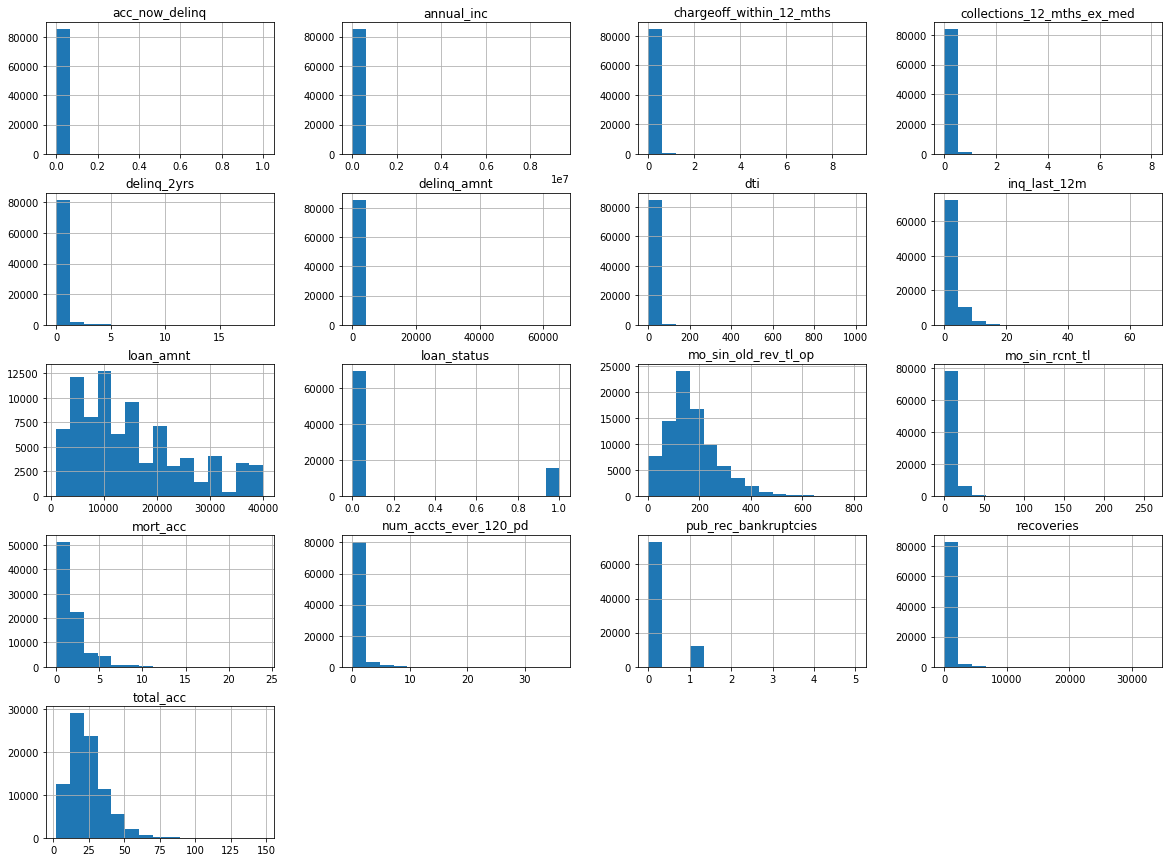

In [87]:
plt.rcParams['figure.figsize']=(20,15)

hist_feat = ['loan_status',
             'annual_inc',
             
             'loan_amnt', 
             
             'recoveries', 
             'chargeoff_within_12_mths', 
             'mort_acc', 
             'pub_rec_bankruptcies',
            'acc_now_delinq',
            'collections_12_mths_ex_med',
            'delinq_2yrs',
            'dti',
            'delinq_amnt',
            'inq_last_12m',
            'mo_sin_old_rev_tl_op',
            'mo_sin_rcnt_tl',
            'num_accts_ever_120_pd',
            'total_acc'
            ]

fp_off_df.hist(column=hist_feat, bins=15)

It's possible to see that the Loan Status categories are heavily unbalanced, favoring the "Fully Paid" Loans.

#### Features to be dropped:

* emp_title: too much string variation and information should be highly correlated with income
* title: same information as purpose
* total_rec_prncp: information gathered after loan has been extended
* total_pymnt: information gathered after loan has been extended
* total_pymnt_inv: information gathered after loan has been extended
* total_rec_prncp: information gathered after loan has been extended
* total_rec_int: information gathered after loan has been extended
* total_rec_late_fee: information gathered after loan has been extended
* recoveries: information gathered after loan has been extended
* collection_recovery_fee: information gathered after loan has been extended
* last_pymnt_d: information gathered after loan has been extended
* next_pymnt_d: information gathered after loan has been extended
* last_credit_pull_d: information gathered after loan has been extended
* zip_code: some zip codes could be related with higher income but values would change between states
* last_pymnt_amnt: information gathered after loan has been extended



In [88]:
drop_feat = ['emp_title',
             'title',
             'total_rec_prncp',
             'total_pymnt',
             'total_pymnt_inv',
             'total_rec_prncp',
             'total_rec_int',
             'total_rec_late_fee',
             'recoveries',
             'collection_recovery_fee',
             'last_pymnt_d',
             'zip_code',
             'last_credit_pull_d',
             'last_pymnt_amnt']

fp_off_df.drop(drop_feat, axis=1, inplace=True)

In [89]:
fp_off_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,loan_status
11,10000.0,10000.0,10000.0,60 months,14.07,233.05,C,C3,4 years,RENT,42000.0,Source Verified,Mar-2018,major_purchase,FL,24.69,0.0,Oct-2004,0.0,17.0,0.0,707.0,15.7,34.0,w,0.0,Individual,0.0,0.0,93913.0,0.0,15.0,0.0,0.0,54.0,93206.0,116.0,0.0,1.0,707.0,111.0,4500.0,0.0,0.0,0.0,1.0,5524.0,3793.0,15.7,0.0,0.0,161.0,88.0,18.0,18.0,0.0,18.0,18.0,14.0,1.0,1.0,2.0,4.0,30.0,2.0,4.0,1.0,17.0,0.0,0.0,0.0,43.8,0.0,0.0,0.0,84930.0,93913.0,4500.0,80430.0,N,0
16,7000.0,7000.0,7000.0,36 months,11.98,232.44,B,B5,< 1 year,MORTGAGE,40000.0,Verified,Mar-2018,home_improvement,TX,20.25,0.0,Mar-2007,0.0,13.0,0.0,5004.0,36.0,29.0,w,0.0,Individual,0.0,0.0,131726.0,1.0,6.0,0.0,2.0,16.0,126722.0,102.0,2.0,2.0,3944.0,90.0,13900.0,2.0,1.0,4.0,4.0,10977.0,4996.0,50.0,0.0,0.0,122.0,132.0,1.0,1.0,0.0,10.0,5.0,3.0,2.0,2.0,3.0,4.0,19.0,7.0,10.0,2.0,13.0,0.0,0.0,2.0,89.7,33.3,0.0,0.0,132817.0,131726.0,10000.0,118917.0,N,0
17,20000.0,20000.0,20000.0,60 months,26.77,607.97,E,E5,3 years,RENT,33500.0,Not Verified,Mar-2018,house,IL,24.40,0.0,Aug-2008,1.0,27.0,0.0,7364.0,46.0,34.0,w,0.0,Individual,0.0,308.0,160804.0,0.0,21.0,0.0,0.0,29.0,153440.0,118.0,0.0,2.0,2607.0,110.0,16000.0,0.0,0.0,2.0,2.0,5956.0,2767.0,68.6,0.0,0.0,115.0,115.0,20.0,20.0,0.0,26.0,5.0,0.0,3.0,6.0,3.0,3.0,27.0,6.0,7.0,6.0,27.0,0.0,0.0,0.0,100.0,33.3,0.0,0.0,146514.0,160804.0,8800.0,130514.0,N,1
20,21000.0,21000.0,21000.0,60 months,20.39,560.94,D,D4,10+ years,OWN,85000.0,Source Verified,Mar-2018,house,NY,15.76,1.0,Nov-2008,0.0,15.0,0.0,14591.0,34.2,27.0,w,0.0,Individual,0.0,0.0,128270.0,1.0,1.0,2.0,2.0,7.0,37076.0,74.0,2.0,5.0,5354.0,34.0,42700.0,6.0,4.0,13.0,8.0,8551.0,16684.0,38.4,0.0,0.0,67.0,112.0,4.0,4.0,3.0,4.0,0.0,0.0,5.0,7.0,6.0,10.0,3.0,12.0,21.0,7.0,15.0,0.0,0.0,4.0,92.6,16.7,0.0,0.0,172433.0,51667.0,27100.0,39733.0,N,0
23,30000.0,30000.0,30000.0,36 months,7.34,930.99,A,A4,3 years,OWN,95000.0,Verified,Mar-2018,house,TX,16.18,1.0,Oct-2009,0.0,10.0,0.0,755.0,0.0,20.0,w,0.0,Individual,0.0,2157.0,12704.0,0.0,1.0,0.0,1.0,22.0,10747.0,74.0,0.0,2.0,741.0,3.0,101800.0,1.0,3.0,0.0,3.0,1412.0,90245.0,0.0,0.0,0.0,101.0,98.0,13.0,13.0,0.0,19.0,24.0,0.0,2.0,2.0,4.0,6.0,5.0,8.0,13.0,2.0,10.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,163978.0,12704.0,91000.0,40690.0,N,0


In [90]:
# Credits: https://towardsdatascience.com/financial-data-analysis-bf4b5e78c45c

fp_off_df.purpose =              fp_off_df.purpose.astype("category", categories=np.unique(fp_off_df.purpose)).cat.codes
fp_off_df.home_ownership =       fp_off_df.home_ownership.astype("category", categories = np.unique(fp_off_df.home_ownership)).cat.codes
fp_off_df.grade =                fp_off_df.grade.astype("category", categories = np.unique(fp_off_df.grade)).cat.codes
fp_off_df.sub_grade =            fp_off_df.sub_grade.astype("category", categories = np.unique(fp_off_df.sub_grade)).cat.codes
fp_off_df.addr_state =           fp_off_df.addr_state.astype("category", categories = np.unique(fp_off_df.addr_state)).cat.codes
fp_off_df.term =                 fp_off_df.term.astype("category", categories = np.unique(fp_off_df.term)).cat.codes
fp_off_df.verification_status =  fp_off_df.verification_status.astype("category", categories = np.unique(fp_off_df.verification_status)).cat.codes
fp_off_df.addr_state =           fp_off_df.addr_state.astype("category", categories = np.unique(fp_off_df.addr_state)).cat.codes
fp_off_df.earliest_cr_line =     fp_off_df.earliest_cr_line.astype("category", categories = np.unique(fp_off_df.earliest_cr_line)).cat.codes
fp_off_df.initial_list_status =  fp_off_df.initial_list_status.astype("category", categories = np.unique(fp_off_df.initial_list_status)).cat.codes
fp_off_df.application_type =     fp_off_df.application_type.astype("category", categories = np.unique(fp_off_df.application_type)).cat.codes
fp_off_df.debt_settlement_flag = fp_off_df.debt_settlement_flag.astype("category", categories = np.unique(fp_off_df.debt_settlement_flag)).cat.codes

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  
c:\program files\python36\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecat

In [91]:
#map
fp_off_df.emp_length.unique()

array(['4 years', '< 1 year', '3 years', '10+ years', '6 years',
       '2 years', '5 years', '9 years', '8 years', '7 years', '1 year',
       nan], dtype=object)

In [92]:
# This mapping will allow to 

emp_length_mapping = {'< 1 year': 0, 
                      '1 year':   1,
                      '2 years':  2,
                      '3 years':  3,
                      '10+ years':10,
                      '6 years':  6,
                      '4 years':  4, 
                      '5 years':  5, 
                      '9 years':  9,
                      '8 years':  8,
                      '7 years':  7                    
                     }
fp_off_df['emp_length'] = fp_off_df['emp_length'].map(emp_length_mapping)


In [93]:
fp_off_df['emp_length'].fillna(fp_off_df.groupby('loan_status')['emp_length'].transform('median'), inplace=True)
fp_off_df.isnull().values.any()

False

In [94]:
fp_off_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,loan_status
11,10000.0,10000.0,10000.0,1,14.07,233.05,2,12,4.0,3,42000.0,1,Mar-2018,5,9,24.69,0.0,570,0.0,17.0,0.0,707.0,15.7,34.0,1,0.0,0,0.0,0.0,93913.0,0.0,15.0,0.0,0.0,54.0,93206.0,116.0,0.0,1.0,707.0,111.0,4500.0,0.0,0.0,0.0,1.0,5524.0,3793.0,15.7,0.0,0.0,161.0,88.0,18.0,18.0,0.0,18.0,18.0,14.0,1.0,1.0,2.0,4.0,30.0,2.0,4.0,1.0,17.0,0.0,0.0,0.0,43.8,0.0,0.0,0.0,84930.0,93913.0,4500.0,80430.0,0,0
16,7000.0,7000.0,7000.0,0,11.98,232.44,1,9,0.0,1,40000.0,2,Mar-2018,3,42,20.25,0.0,418,0.0,13.0,0.0,5004.0,36.0,29.0,1,0.0,0,0.0,0.0,131726.0,1.0,6.0,0.0,2.0,16.0,126722.0,102.0,2.0,2.0,3944.0,90.0,13900.0,2.0,1.0,4.0,4.0,10977.0,4996.0,50.0,0.0,0.0,122.0,132.0,1.0,1.0,0.0,10.0,5.0,3.0,2.0,2.0,3.0,4.0,19.0,7.0,10.0,2.0,13.0,0.0,0.0,2.0,89.7,33.3,0.0,0.0,132817.0,131726.0,10000.0,118917.0,0,0
17,20000.0,20000.0,20000.0,1,26.77,607.97,4,24,3.0,3,33500.0,0,Mar-2018,4,13,24.40,0.0,96,1.0,27.0,0.0,7364.0,46.0,34.0,1,0.0,0,0.0,308.0,160804.0,0.0,21.0,0.0,0.0,29.0,153440.0,118.0,0.0,2.0,2607.0,110.0,16000.0,0.0,0.0,2.0,2.0,5956.0,2767.0,68.6,0.0,0.0,115.0,115.0,20.0,20.0,0.0,26.0,5.0,0.0,3.0,6.0,3.0,3.0,27.0,6.0,7.0,6.0,27.0,0.0,0.0,0.0,100.0,33.3,0.0,0.0,146514.0,160804.0,8800.0,130514.0,0,1
20,21000.0,21000.0,21000.0,1,20.39,560.94,3,18,10.0,2,85000.0,1,Mar-2018,4,33,15.76,1.0,521,0.0,15.0,0.0,14591.0,34.2,27.0,1,0.0,0,0.0,0.0,128270.0,1.0,1.0,2.0,2.0,7.0,37076.0,74.0,2.0,5.0,5354.0,34.0,42700.0,6.0,4.0,13.0,8.0,8551.0,16684.0,38.4,0.0,0.0,67.0,112.0,4.0,4.0,3.0,4.0,0.0,0.0,5.0,7.0,6.0,10.0,3.0,12.0,21.0,7.0,15.0,0.0,0.0,4.0,92.6,16.7,0.0,0.0,172433.0,51667.0,27100.0,39733.0,0,0
23,30000.0,30000.0,30000.0,0,7.34,930.99,0,3,3.0,2,95000.0,2,Mar-2018,4,42,16.18,1.0,575,0.0,10.0,0.0,755.0,0.0,20.0,1,0.0,0,0.0,2157.0,12704.0,0.0,1.0,0.0,1.0,22.0,10747.0,74.0,0.0,2.0,741.0,3.0,101800.0,1.0,3.0,0.0,3.0,1412.0,90245.0,0.0,0.0,0.0,101.0,98.0,13.0,13.0,0.0,19.0,24.0,0.0,2.0,2.0,4.0,6.0,5.0,8.0,13.0,2.0,10.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,163978.0,12704.0,91000.0,40690.0,0,0


### Data split

In [95]:
fp_off_df['issue_d'] = fp_off_df['issue_d'].map(lambda x: x.rstrip('-2018'))

In [96]:
fp_off_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,loan_status
11,10000.0,10000.0,10000.0,1,14.07,233.05,2,12,4.0,3,42000.0,1,Mar,5,9,24.69,0.0,570,0.0,17.0,0.0,707.0,15.7,34.0,1,0.0,0,0.0,0.0,93913.0,0.0,15.0,0.0,0.0,54.0,93206.0,116.0,0.0,1.0,707.0,111.0,4500.0,0.0,0.0,0.0,1.0,5524.0,3793.0,15.7,0.0,0.0,161.0,88.0,18.0,18.0,0.0,18.0,18.0,14.0,1.0,1.0,2.0,4.0,30.0,2.0,4.0,1.0,17.0,0.0,0.0,0.0,43.8,0.0,0.0,0.0,84930.0,93913.0,4500.0,80430.0,0,0
16,7000.0,7000.0,7000.0,0,11.98,232.44,1,9,0.0,1,40000.0,2,Mar,3,42,20.25,0.0,418,0.0,13.0,0.0,5004.0,36.0,29.0,1,0.0,0,0.0,0.0,131726.0,1.0,6.0,0.0,2.0,16.0,126722.0,102.0,2.0,2.0,3944.0,90.0,13900.0,2.0,1.0,4.0,4.0,10977.0,4996.0,50.0,0.0,0.0,122.0,132.0,1.0,1.0,0.0,10.0,5.0,3.0,2.0,2.0,3.0,4.0,19.0,7.0,10.0,2.0,13.0,0.0,0.0,2.0,89.7,33.3,0.0,0.0,132817.0,131726.0,10000.0,118917.0,0,0
17,20000.0,20000.0,20000.0,1,26.77,607.97,4,24,3.0,3,33500.0,0,Mar,4,13,24.40,0.0,96,1.0,27.0,0.0,7364.0,46.0,34.0,1,0.0,0,0.0,308.0,160804.0,0.0,21.0,0.0,0.0,29.0,153440.0,118.0,0.0,2.0,2607.0,110.0,16000.0,0.0,0.0,2.0,2.0,5956.0,2767.0,68.6,0.0,0.0,115.0,115.0,20.0,20.0,0.0,26.0,5.0,0.0,3.0,6.0,3.0,3.0,27.0,6.0,7.0,6.0,27.0,0.0,0.0,0.0,100.0,33.3,0.0,0.0,146514.0,160804.0,8800.0,130514.0,0,1
20,21000.0,21000.0,21000.0,1,20.39,560.94,3,18,10.0,2,85000.0,1,Mar,4,33,15.76,1.0,521,0.0,15.0,0.0,14591.0,34.2,27.0,1,0.0,0,0.0,0.0,128270.0,1.0,1.0,2.0,2.0,7.0,37076.0,74.0,2.0,5.0,5354.0,34.0,42700.0,6.0,4.0,13.0,8.0,8551.0,16684.0,38.4,0.0,0.0,67.0,112.0,4.0,4.0,3.0,4.0,0.0,0.0,5.0,7.0,6.0,10.0,3.0,12.0,21.0,7.0,15.0,0.0,0.0,4.0,92.6,16.7,0.0,0.0,172433.0,51667.0,27100.0,39733.0,0,0
23,30000.0,30000.0,30000.0,0,7.34,930.99,0,3,3.0,2,95000.0,2,Mar,4,42,16.18,1.0,575,0.0,10.0,0.0,755.0,0.0,20.0,1,0.0,0,0.0,2157.0,12704.0,0.0,1.0,0.0,1.0,22.0,10747.0,74.0,0.0,2.0,741.0,3.0,101800.0,1.0,3.0,0.0,3.0,1412.0,90245.0,0.0,0.0,0.0,101.0,98.0,13.0,13.0,0.0,19.0,24.0,0.0,2.0,2.0,4.0,6.0,5.0,8.0,13.0,2.0,10.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,163978.0,12704.0,91000.0,40690.0,0,0


In [97]:
issue_d_mapping = {'Jan': 1,
                   'Feb': 2,                     
                   'Mar': 3,                     
                   'Apr': 4,                     
                   'May': 5,                     
                   'Jun': 6,                    
                   'Jul': 7,                     
                   'Aug': 8, 
                   'Sep': 9,
                   'Oct': 10,                     
                   'Nov': 11,
                   'Dec': 12
                  }
fp_off_df['issue_d'] = fp_off_df['issue_d'].map(issue_d_mapping)

In [98]:
# eliminating outliers
fp_off_df = fp_off_df[(np.abs(stats.zscore(fp_off_df)) < 3).all(axis=1)] # from stack overflow

fp_off_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50761 entries, 16 to 128407
Data columns (total 81 columns):
loan_amnt                     50761 non-null float64
funded_amnt                   50761 non-null float64
funded_amnt_inv               50761 non-null float64
term                          50761 non-null int8
int_rate                      50761 non-null float64
installment                   50761 non-null float64
grade                         50761 non-null int8
sub_grade                     50761 non-null int8
emp_length                    50761 non-null float64
home_ownership                50761 non-null int8
annual_inc                    50761 non-null float64
verification_status           50761 non-null int8
issue_d                       50761 non-null int64
purpose                       50761 non-null int8
addr_state                    50761 non-null int8
dti                           50761 non-null float64
delinq_2yrs                   50761 non-null float64
earliest_cr

In [99]:
train_mths = [1, 2, 3, 4, 5, 6, 7, 8, 9]
test_mths  = [10, 11, 12]

train_df = fp_off_df[fp_off_df['issue_d'].isin(train_mths)]

test_df =  fp_off_df[fp_off_df['issue_d'].isin(test_mths)]

In [100]:
train_df.sample(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,loan_status
99361,25000.0,25000.0,25000.0,0,13.58,849.35,2,11,10.0,1,110000.0,2,4,1,22,23.91,0.0,40,1.0,15.0,1.0,44379.0,79.8,25.0,1,0.0,0,0.0,0.0,386264.0,1.0,3.0,1.0,2.0,3.0,27558.0,64.0,1.0,1.0,17880.0,73.0,55600.0,1.0,0.0,2.0,4.0,25751.0,2892.0,93.6,0.0,0.0,177.0,119.0,11.0,3.0,2.0,11.0,3.0,0.0,8.0,11.0,8.0,10.0,7.0,11.0,16.0,11.0,15.0,0.0,0.0,2.0,100.0,62.5,1.0,0.0,424767.0,71937.0,45300.0,43364.0,0,0
65928,31025.0,31025.0,31025.0,1,28.72,979.51,5,25,10.0,1,45760.0,2,2,3,4,55.99,0.0,504,1.0,16.0,0.0,9481.0,26.6,30.0,1,0.0,1,0.0,0.0,267502.0,2.0,4.0,1.0,3.0,3.0,60756.0,81.0,0.0,0.0,4332.0,63.0,35700.0,0.0,2.0,4.0,4.0,16719.0,8532.0,38.6,0.0,0.0,46.0,314.0,31.0,3.0,1.0,34.0,3.0,0.0,2.0,7.0,2.0,4.0,6.0,11.0,23.0,7.0,16.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,309208.0,70237.0,13900.0,75438.0,0,1
25201,10000.0,10000.0,10000.0,0,19.42,368.69,3,17,9.0,1,99000.0,0,6,2,4,9.90,1.0,81,0.0,7.0,1.0,6344.0,47.0,17.0,1,0.0,0,0.0,0.0,60622.0,0.0,2.0,0.0,1.0,20.0,54278.0,12.0,0.0,3.0,734.0,29.0,13500.0,0.0,4.0,0.0,4.0,8660.0,5802.0,13.4,0.0,0.0,193.0,298.0,15.0,15.0,2.0,15.0,15.0,0.0,2.0,3.0,3.0,3.0,5.0,5.0,10.0,3.0,7.0,0.0,0.0,0.0,94.1,33.3,1.0,0.0,118051.0,60622.0,6700.0,104551.0,0,0
182,2650.0,2650.0,2650.0,0,15.04,91.92,2,13,10.0,2,26000.0,1,3,8,42,31.26,0.0,304,0.0,8.0,0.0,2819.0,31.7,36.0,0,0.0,0,0.0,388.0,29164.0,0.0,2.0,1.0,4.0,7.0,26345.0,83.0,1.0,2.0,1236.0,72.0,8900.0,1.0,7.0,1.0,6.0,3646.0,1264.0,49.4,0.0,0.0,236.0,138.0,9.0,7.0,0.0,9.0,7.0,0.0,1.0,3.0,1.0,4.0,27.0,6.0,9.0,3.0,8.0,0.0,0.0,2.0,97.2,0.0,0.0,0.0,40592.0,29164.0,2500.0,31692.0,0,0
50014,12000.0,12000.0,12000.0,0,10.56,390.37,1,7,6.0,3,46836.0,2,5,2,4,14.55,0.0,567,0.0,5.0,1.0,18966.0,71.6,6.0,1,0.0,0,0.0,0.0,18966.0,0.0,0.0,0.0,0.0,11.0,0.0,74.0,1.0,1.0,8687.0,72.0,26500.0,0.0,0.0,0.0,1.0,4742.0,5034.0,79.0,0.0,0.0,128.0,199.0,7.0,7.0,0.0,48.0,5.0,0.0,3.0,3.0,3.0,4.0,0.0,5.0,6.0,3.0,5.0,0.0,0.0,1.0,100.0,66.7,1.0,0.0,26500.0,18966.0,24000.0,0.0,0,0
7250,6000.0,6000.0,6000.0,0,8.46,189.30,0,4,10.0,1,78000.0,2,9,2,47,21.17,0.0,622,0.0,10.0,0.0,4230.0,16.5,56.0,1,0.0,0,0.0,0.0,55433.0,1.0,3.0,3.0,4.0,6.0,51203.0,89.0,5.0,6.0,604.0,53.0,25600.0,4.0,6.0,9.0,10.0,5543.0,10352.0,5.9,0.0,0.0,149.0,156.0,7.0,6.0,5.0,8.0,3.0,0.0,2.0,4.0,3.0,11.0,25.0,7.0,26.0,4.0,10.0,0.0,0.0,8.0,100.0,0.0,0.0,0.0,94701.0,55433.0,11000.0,69101.0,0,0
77206,30000.0,30000.0,30000.0,0,11.99,996.29,1,9,4.0,1,95000.0,1,1,2,39,13.07,0.0,468,0.0,21.0,0.0,25486.0,36.3,36.0,1,0.0,0,0.0,0.0,185482.0,2.0,6.0,2.0,3.0,5.0,51779.0,82.0,1.0,3.0,10912.0,58.0,70200.0,1.0,1.0,3.0,6.0,9274.0,22208.0,40.1,0.0,0.0,140.0,134.0,1.0,1.0,2.0,1.0,3.0,0.0,4.0,8.0,6.0,8.0,11.0,14.0,23.0,8.0,21.0,0.0,0.0,3.0,100.0,33.3,0.0,0.0,257115.0,77265.0,37100.0,63568.0,0,0
72673,5300.0,5300.0,5300.0,0,23.88,207.61,4,21,5.0,3,27000.0,1,1,2,9,9.42,0.0,623,1.0,8.0,0.0,3315.0,28.8,29.0,0,0.0,0,0.0,300.0,69067.0,1.0,2.0,1.0,2.0,4.0,65752.0,99.

In [101]:
test_df.sample(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,loan_status
33988,5000.0,5000.0,5000.0,0,8.81,158.56,0,4,5.0,3,59110.0,0,12,1,26,33.52,1.0,368,0.0,14.0,0.0,6670.0,22.5,39.0,0,0.0,0,0.0,246.0,164585.0,1.0,4.0,0.0,1.0,21.0,157915.0,67.0,1.0,4.0,4606.0,51.0,29700.0,1.0,0.0,0.0,5.0,11756.0,15237.0,30.1,0.0,0.0,150.0,150.0,4.0,4.0,0.0,29.0,21.0,0.0,4.0,6.0,5.0,6.0,24.0,10.0,15.0,6.0,14.0,0.0,0.0,1.0,94.7,0.0,0.0,0.0,191573.0,164585.0,21800.0,161873.0,0,0
87989,16800.0,16800.0,16800.0,1,11.55,369.90,1,8,10.0,1,40000.0,2,10,0,9,34.53,0.0,84,1.0,15.0,1.0,4964.0,6.7,33.0,1,0.0,0,0.0,0.0,56581.0,2.0,2.0,3.0,4.0,4.0,51617.0,98.0,1.0,3.0,1722.0,16.0,73900.0,5.0,1.0,7.0,7.0,3772.0,44462.0,7.2,0.0,0.0,156.0,266.0,3.0,3.0,0.0,3.0,3.0,0.0,4.0,6.0,7.0,9.0,12.0,13.0,21.0,6.0,15.0,0.0,0.0,4.0,100.0,0.0,1.0,0.0,131160.0,56581.0,47900.0,57260.0,0,0
22923,10000.0,10000.0,10000.0,0,10.33,324.23,1,5,10.0,3,60000.0,0,12,0,46,15.93,0.0,238,1.0,11.0,0.0,5612.0,16.0,28.0,1,0.0,0,0.0,0.0,17159.0,1.0,1.0,1.0,3.0,5.0,11547.0,43.0,1.0,4.0,3238.0,28.0,35000.0,2.0,4.0,2.0,7.0,1560.0,4598.0,53.6,0.0,0.0,152.0,395.0,12.0,5.0,3.0,12.0,5.0,1.0,3.0,6.0,3.0,4.0,7.0,10.0,18.0,6.0,11.0,0.0,0.0,2.0,89.3,66.7,0.0,0.0,61877.0,17159.0,9900.0,26877.0,0,0
100975,35000.0,35000.0,35000.0,1,13.56,806.43,2,10,4.0,3,46000.0,2,10,2,9,5.19,0.0,43,0.0,7.0,0.0,7508.0,31.5,17.0,1,0.0,0,0.0,0.0,45842.0,2.0,2.0,1.0,2.0,2.0,38334.0,116.0,1.0,1.0,2775.0,80.0,23800.0,1.0,0.0,0.0,3.0,6549.0,16292.0,31.5,0.0,0.0,149.0,59.0,5.0,2.0,0.0,5.0,14.0,0.0,5.0,5.0,5.0,6.0,9.0,5.0,8.0,5.0,7.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,56995.0,45842.0,23800.0,33195.0,0,1
84020,10000.0,10000.0,10000.0,0,11.06,327.68,1,7,8.0,1,60000.0,1,10,2,3,33.08,0.0,151,0.0,15.0,0.0,8568.0,31.4,26.0,0,0.0,0,0.0,912.0,350070.0,0.0,2.0,2.0,2.0,9.0,67117.0,91.0,1.0,2.0,2298.0,62.0,27300.0,2.0,0.0,9.0,6.0,23338.0,5832.0,39.9,0.0,0.0,75.0,105.0,10.0,7.0,2.0,20.0,10.0,0.0,2.0,8.0,3.0,3.0,7.0,12.0,17.0,8.0,15.0,0.0,0.0,4.0,100.0,33.3,0.0,0.0,380587.0,75685.0,9700.0,76435.0,0,0
45061,14000.0,14000.0,14000.0,0,20.89,526.67,3,18,8.0,1,100000.0,0,11,2,42,30.30,0.0,91,1.0,10.0,0.0,7630.0,31.5,43.0,1,0.0,0,0.0,0.0,81443.0,2.0,5.0,3.0,4.0,2.0,73813.0,45.0,1.0,1.0,7630.0,41.0,24200.0,5.0,3.0,10.0,6.0,9049.0,2370.0,76.3,0.0,0.0,183.0,173.0,9.0,2.0,3.0,51.0,2.0,4.0,1.0,1.0,1.0,4.0,24.0,5.0,16.0,1.0,10.0,0.0,0.0,4.0,90.7,100.0,0.0,0.0,138598.0,81443.0,10000.0,114398.0,0,0
79072,2400.0,2400.0,2400.0,0,15.02,83.23,2,12,0.0,2,40000.0,0,11,1,4,22.11,1.0,627,0.0,9.0,0.0,7608.0,18.5,18.0,1,0.0,0,0.0,0.0,22816.0,0.0,1.0,0.0,2.0,18.0,15208.0,51.0,0.0,1.0,7234.0,32.0,41200.0,0.0,0.0,1.0,3.0,2535.0,28812.0,20.4,0.0,0.0,80.0,98.0,18.0,18.0,0.0,18.0,1.0,0.0,2.0,3.0,6.0,9.0,5.0,8.0,13.0,3.0,9.0,0.0,0.0,0.0,83.3,0.0,0.0,0.0,71228.0,22816.0,36200.0,30028.0,0,0
52282,20000.0,20000.0,20000.0,1,22.35,556.37,3,19,2.0,3,29700.0,1,11,2,3,37.66,0.0,100,0.0,7.0,0.0,4757.0,20.3,11.0,1,0.0,1,0.0,82.0,38818.0,1.0,2.0,0.

In [102]:
# transfer new data into new X and y arrays for the training set

X_train = np.array(train_df.iloc[:, :-1].values)
y_train = np.array(train_df.iloc[:,  -1].values) # class label is contained here

np.mean(y_train), np.std(y_train), np.var(y_train)  

(0.17774318715033388, 0.3822964119266296, 0.14615054657197526)

In [103]:
# transfer new data into new X and y arrays for the test set

X_test = np.array(test_df.iloc[:, :-1].values)
y_test = np.array(test_df.iloc[:,  -1].values) # class label is contained here

np.mean(y_test), np.std(y_test), np.var(y_test)  

(0.08767293642157625, 0.282818656811736, 0.0799863926407945)

In [104]:
### Oversampling the minority class of the training set with SMOTE

print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(sampling_strategy ='minority', random_state = 1)
              
X_res, y_res = smote.fit_resample(X_train, y_train)
              
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 36449, 1: 7879})
Resampled dataset shape Counter({0: 36449, 1: 36449})


In [105]:
# Scaling data

stdsc = StandardScaler()

X_train = stdsc.fit_transform(X_res)
X_test = stdsc.transform(X_test)
y_train = y_res

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(72898, 80)
(72898,)
(6433, 80)
(6433,)


### Early classification results with a base Random Forest Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_jobs=-1)
rnd_clf.fit(X_train, y_train)

c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [56]:
# Identification of the most important features for a RF
sorted(zip(rnd_clf.feature_importances_, train_df.columns), reverse=True)

[(0.0712637585764214, 'term'),
 (0.05211165791482105, 'grade'),
 (0.04939120712188691, 'sub_grade'),
 (0.048465143958995836, 'int_rate'),
 (0.03912896735355157, 'verification_status'),
 (0.037286783996043224, 'inq_last_6mths'),
 (0.029673176732603213, 'emp_length'),
 (0.025151973331514976, 'open_rv_12m'),
 (0.024173764468070392, 'inq_last_12m'),
 (0.023297465382816858, 'purpose'),
 (0.020469454080397537, 'home_ownership'),
 (0.019356625478441664, 'open_il_12m'),
 (0.01613436383565336, 'percent_bc_gt_75'),
 (0.015034738623136007, 'open_acc_6m'),
 (0.01464821333345175, 'mo_sin_rcnt_rev_tl_op'),
 (0.01428940350851739, 'num_actv_rev_tl'),
 (0.01392785184274753, 'issue_d'),
 (0.013229825253455771, 'initial_list_status'),
 (0.013156374778390986, 'num_rev_tl_bal_gt_0'),
 (0.012053846335680359, 'mths_since_recent_inq'),
 (0.011422786087483918, 'mo_sin_rcnt_tl'),
 (0.01141674308261372, 'tot_hi_cred_lim'),
 (0.011389370112112409, 'installment'),
 (0.011135322346728191, 'dti'),
 (0.01108813169439

In [57]:
def testing_metrics(clf, X_test, y_test, prediction):
    
    # testing metrics
    print("Evaluation parameters on testing data:")
    print("\n")

    print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, prediction)))
    print("AUC: {0:.4f}".format(metrics.roc_auc_score(y_test, prediction)))
    print("Precision: {0:.4f}".format(metrics.precision_score(y_test, prediction)))
    print("Recall: {0:.4f}".format(metrics.recall_score(y_test, prediction)))
    print("F1: {0:.4f}".format(metrics.f1_score(y_test, prediction)))

    print("\n")
    print("Confusion Matrix")
    print(confusion_matrix(y_test, prediction))

    tr_probas = clf.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, tr_probas[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    current_auc = str('%.2f' %roc_auc)
    fig = plt.figure(figsize=(5, 5))    
    plt.plot(fpr, tpr, lw=1, label= str('Classifier on testing data' + ' AUC: ' + current_auc))

    plt.plot([0, 1], 
             [0, 1], 
             linestyle='--', 
             color=(0.6, 0.6, 0.6), 
             label='random guessing')

    plt.plot([0, 0, 1], 
             [0, 1, 1], 
             lw=2, 
             linestyle=':', 
             color='black', 
             label='perfect performance')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('Receiver Operator Characteristic')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()


Evaluation parameters on testing data:


Accuracy: 0.8935
AUC: 0.5225
Precision: 0.2020
Recall: 0.0727
F1: 0.1069


Confusion Matrix
[[5707  162]
 [ 523   41]]


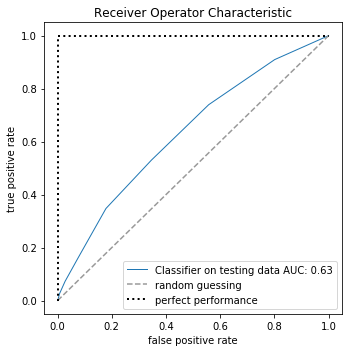

In [58]:
rfc_pred = rnd_clf.predict(X_test)

testing_metrics(rnd_clf, X_test, y_test, rfc_pred)

c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:2

c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:2

c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:2

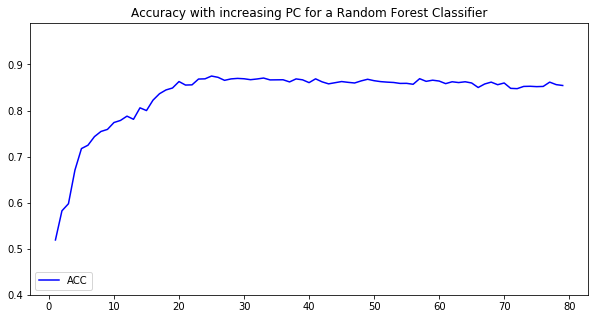

In [59]:
def plotvector(X_train, y_train, X_test, y_test):
    results = []
    
    for i in range(1, 80):
        pipe_rfc = Pipeline([('pca', PCA(n_components=i, random_state=1)),
                     ('clf', RandomForestClassifier(n_jobs=-1, random_state=1))])
        
        pipe_rfc.fit(X_train, y_train)
        results.append([i, pipe_rfc.score(X_test, y_test)])
 
    return np.array(results)

PCA_accuracy =  plotvector(X_train, y_train, X_test, y_test)

plt.rcParams['figure.figsize']=(10,5)
plt.plot(PCA_accuracy[:,0], PCA_accuracy[:,1], color='b', label='ACC')
plt.legend(loc=3)
plt.ylim(0.4, 0.99)
plt.title("Accuracy with increasing PC for a Random Forest Classifier")
plt.show()

In [109]:
# Let's see how different classifiers do with this dataset

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Machine Learning Algorithm (MLA) Selection and Initialization

MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier(),  

    #Gaussian Processes
    #gaussian_process.GaussianProcessClassifier(), # memory error
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
         
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    #SVM
    svm.SVC(probability=True)
    #svm.NuSVC(probability=True),
    #svm.LinearSVC(), # better for 10,000s of datapoints
      
    ]

#create table to compare MLA predictions
MLA_predict = fp_off_df['loan_status']

In [ ]:
cv_split = 3 # simple cross-validation to save time. The higher the better

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    print(MLA_name)
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    pipe_alg = Pipeline([('pca', PCA(n_components=25)),
                         ('clf', alg)])
    
    cv_results = model_selection.cross_validate(pipe_alg, X_train, y_train, cv=cv_split, n_jobs=-1, verbose=3, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()  
    
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions 
    pipe_alg.fit(X_train, y_train)
    MLA_predict[MLA_name] = pipe_alg.predict(X_test)
    gc.collect()
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

AdaBoostClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.6s finished


BaggingClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   43.3s finished


ExtraTreesClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.2s finished
c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoostingClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished


RandomForestClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   18.7s finished
c:\program files\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


XGBClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.0s finished
